> [!NOTE]
> Useful information that users should know, even when skimming content.



> [!TIP]
> Helpful advice for doing things better or more easily.

> [!IMPORTANT]
> Key information users need to know to achieve their goal.

> [!WARNING]
> Urgent info that needs immediate user attention to avoid problems.

> [!CAUTION]
> Advises about risks or negative outcomes of certain actions.

<!-- This content will not appear in the rendered Markdown -->

# Student Academic Achievement Classification System

On average the United States spends 39% more per student on education compared to most other developed countries. However US students academic performance in math and reading tend to be below average compared to other developed countries who spend significantly less per student.
There are sevaral factors which are attributed to lower academic perfomance in the US compared to its counter parts. These include: Inefficient allocation of resources (money not distributed evenly), Socioeconomic factors (Income inequality, Unstable home enviornments), Smaller class sizes, Focus on standardized testing, Teacher quality and training, Non-educational costs (Large portion of money goes towards health and liability insurance). 

In this project, I will create a two systems: one that predicts student grades and a classification system that helps schools to know how many of their students are performing 'very low', 'low', 'average', 'high' and 'very high'. This classification system will help administrators identify how much intervention will be needed in math, reading and science as well as help teacher determine how they should adjust the rigor of their material based on propotion of students for each category. 

# 1. The Data: 

## Source: 

The data was obtained from [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/320/student+performance)

In [36]:
%pip install matplotlib_inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

import plotly.express as px
import plotly.io as pio
from collections import Counter


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
df = pd.read_csv('student-mat.csv',delimiter=';')

In [38]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [39]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [41]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

Check for missing values, duplicates and outliers

In [42]:
#Checking for missing values
Na_count = df.isna().sum()
Na_count

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [43]:
#Checking for duplicates
duplicates = df.duplicated().sum()
duplicates

0

## Quick EDA

In [44]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [45]:
df['school'].value_counts()

school
GP    349
MS     46
Name: count, dtype: int64

In [46]:
df['age'].value_counts()

age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64

In [47]:
df['age'].value_counts()

age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64

Note: Most of the data is for students ages 15-19 with only 4 students being 20 and over. These could be considered outliers and should be dropped. 

In [48]:
mask = df['age'] < 20 

In [49]:
student_df = df[mask]

In [50]:
#student_df now only has data for students ages 15-19

student_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [51]:
#Check to make sure data is for students under 20 years of age. 
student_df['age'].max()

19

In [52]:
#Dropping school column since it is not a feature of importance for my purposes
student_df = student_df.drop('school', axis=1)

## Data Manipulation

# Feature Engineering 



Change columns G1,G2,G3 these represent grades for three trimesters, I need to change these since they are on a scale of 0-20. I want them to reflect grades in USA 0-100.

In [53]:
#Change grade scale from 0-20 to 0-100 by multiplying each element in G1,G2,G3 by 5 since 20 is 1/5 of 100.
cols_to_multiply = ['G1','G2','G3']
student_df[cols_to_multiply] = student_df[cols_to_multiply] * 5

In [54]:
#Check to see if columns are now on scale of 0-100
student_df[cols_to_multiply].head(20)

,G1,G2,G3
0,25,30,30
1,25,25,30
2,35,40,50
3,75,70,75
4,30,50,50
5,75,75,75
6,60,60,55
7,30,25,30
8,80,90,95
9,70,75,75


# Feature: Absence percent

Create an absence % feature using the 'absences' column. I did an internet search which showed that in portugal students attend for 180 days.

In [55]:
#Most number of school days missed. 
student_df['absences'].max()

75

In [56]:
student_df['absences'].value_counts()

absences
0     114
2      65
4      52
6      31
8      22
10     17
14     12
12     12
7       7
3       7
16      6
5       5
18      5
20      4
9       3
13      3
15      3
22      3
1       3
11      2
38      1
30      1
40      1
23      1
19      1
28      1
75      1
21      1
24      1
56      1
26      1
54      1
25      1
17      1
Name: count, dtype: int64

In [57]:
#Creating feature/column 'abscense %' by dividing the elements in 'absence' by 180 which is the total number of school days. 

student_df['absences %'] = student_df['absences']/180

In [58]:
#Have to multiply by 100 to get percentage 
student_df['absences %'] = student_df['absences %'] *100

In [59]:
student_df['absences %'].head()

0    3.333333
1    2.222222
2    5.555556
3    1.111111
4    2.222222
Name: absences %, dtype: float64

In [60]:
student_df['absences %'] = student_df['absences %'].round(2)

In [61]:
student_df['absences %'].head()

0    3.33
1    2.22
2    5.56
3    1.11
4    2.22
Name: absences %, dtype: float64

In [62]:
student_df['absences'].describe()

count    390.000000
mean       5.694872
std        8.026097
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

## Feature: Attendance category:

In [63]:

labels = ['Zero', 'Low', 'Average', 'High']
student_df['absences_category'] = pd.qcut(student_df['absences'], 
                                       q=5, 
                                       labels=labels, duplicates="drop") # This helps to fix a value error since there many 0 for absences. This tells pd.qcut to drop duplicate bin edges and adjust the quantiles. 

# View the data
print(student_df['absences_category'].head())

0    Average
1        Low
2    Average
3       Zero
4        Low
Name: absences_category, dtype: category
Categories (4, object): ['Zero' < 'Low' < 'Average' < 'High']


## Exploring Grades for semesters 1,2 and 3

In [64]:
student_df['G1'].describe()

count    390.000000
mean      54.512821
std       16.542959
min       15.000000
25%       40.000000
50%       55.000000
75%       65.000000
max       95.000000
Name: G1, dtype: float64

In [65]:
student_df['G2'].describe()

count    390.000000
mean      53.525641
std       18.788995
min        0.000000
25%       45.000000
50%       55.000000
75%       65.000000
max       95.000000
Name: G2, dtype: float64

In [66]:
student_df['G3'].describe()

count    390.000000
mean      52.012821
std       22.916801
min        0.000000
25%       40.000000
50%       55.000000
75%       68.750000
max      100.000000
Name: G3, dtype: float64

## Create Feature: 'average_grade' by combining semesters 1,2 and 3 and getting average 

In [67]:
student_df['average_grade'] = student_df[['G1','G2','G3']].mean(axis=1) #axis=1 ensurse that the mean is drawn from each individual row (i.e. each student)

In [68]:
student_df['average_grade'] = student_df['average_grade'].round(2) 

In [69]:
student_df['average_grade'].head() 

0    28.33
1    26.67
2    41.67
3    73.33
4    43.33
Name: average_grade, dtype: float64

In [70]:
student_df['average_grade'].describe()

count    390.000000
mean      53.350615
std       18.456103
min        6.670000
25%       41.670000
50%       53.330000
75%       66.670000
max       96.670000
Name: average_grade, dtype: float64

## Creating classification feature based on percentile that student grades fall into.
'very low' will be below 20th percentile

'low' will be between 20th and 40th percentile.

'average' will be between 40th and 60th percentile.

'high' will be between 60th and 8th percentile.

'very high' will be above 80th percentile.

In [78]:
#using pandas.qcut to assign categories

labels = ['very low','low', 'average', 'high']
student_df['grade_category'] = pd.qcut(student_df['average_grade'], 
                                       q=[0,0.16, 0.5, 0.84,1.0], 
                                       labels=labels)

# View the data
print(student_df[['average_grade', 'grade_category']].head())


#student_df['grade_category'] = pd.qcut(student_df['average_grade'], 
#                                       q=[0,0.2, 0.4, 0.6, 0.8, 1.0], 
 #                                      labels=labels)

   average_grade grade_category
0          28.33       very low
1          26.67       very low
2          41.67            low
3          73.33           high
4          43.33            low


In [79]:
#checking grade_category feature 
student_df['grade_category'].head()

0    very low
1    very low
2         low
3        high
4         low
Name: grade_category, dtype: category
Categories (4, object): ['very low' < 'low' < 'average' < 'high']

In [80]:
student_df['grade_category'].value_counts()

grade_category
low         132
average     127
very low     68
high         63
Name: count, dtype: int64

In [81]:
student_df['grade_category'].isna().sum()

0

In [82]:
student_df['average_grade'].describe()

count    390.000000
mean      53.350615
std       18.456103
min        6.670000
25%       41.670000
50%       53.330000
75%       66.670000
max       96.670000
Name: average_grade, dtype: float64

In [83]:
student_df['grade_category'].value_counts()

grade_category
low         132
average     127
very low     68
high         63
Name: count, dtype: int64

In [84]:
student_df.columns

Index(['sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob',
       'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'absences %',
       'absences_category', 'average_grade', 'grade_category'],
      dtype='object')

In [85]:
student_df['absences_category'].head(20)

0     Average
1         Low
2     Average
3        Zero
4         Low
5     Average
6        Zero
7     Average
8        Zero
9        Zero
10       Zero
11        Low
12       Zero
13       Zero
14       Zero
15        Low
16    Average
17        Low
18       High
19        Low
Name: absences_category, dtype: category
Categories (4, object): ['Zero' < 'Low' < 'Average' < 'High']

## Saving cleaned csv file

In [86]:
import os

print(os.getcwd())

/Users/vcarrillo/Springboard/Capstone_2_Student_data


In [87]:
student_df.to_csv('student_df.csv', index=False)

print("File saved as 'cleaned_data.csv'")

File saved as 'cleaned_data.csv'


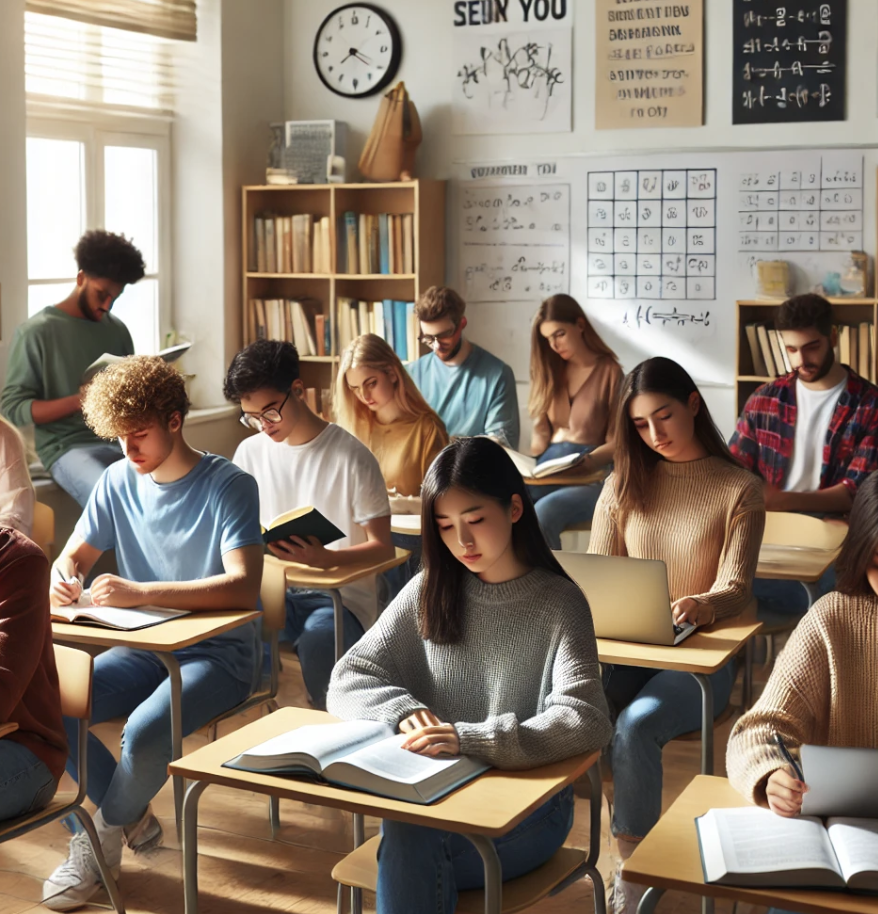